In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def generate_thrust_profile(duration, thrust_duration, thrust_force, dt=0.01):
    thrust_profile = []
    for t in np.arange(0, duration + dt, dt):
        if t < thrust_duration:
            thrust_profile.append(thrust_force)
        else:
            thrust_profile.append(0)
    return np.array(thrust_profile)

In [55]:
def generate_linear_thrust_profile(duration, thrust_duration, initial_thrust, final_thrust, dt=0.01):
    thrust_profile = []
    for t in np.arange(0, duration + dt, dt):
        if t < thrust_duration:
            # linear interpolation between initial and final thrust values
            thrust = initial_thrust + (final_thrust - initial_thrust) * t / thrust_duration
        else:
            thrust = 0
        thrust_profile.append(thrust)
    return np.array(thrust_profile)

In [56]:
def generate_sine_thrust_profile(duration, thrust_duration, peak_thrust, dt=0.01):
    thrust_profile = []
    for t in np.arange(0, duration + dt, dt):
        if t < thrust_duration:
            # smooth thrust curve
            thrust = peak_thrust * np.sin(np.pi * t / thrust_duration)
        else:
            thrust = 0
        thrust_profile.append(thrust)
    return np.array(thrust_profile)

In [57]:
def generate_realistic_thrust_profile(duration, thrust_duration, peak_thrust, dt=0.01):
    thrust_profile = []
    for t in np.arange(0, duration + dt, dt):
        if t < 0.1 * thrust_duration:
            # ignition and rapid rise (modeled as quadratic rise)
            thrust = peak_thrust * (10 * t / thrust_duration)**2
        elif t < 0.3 * thrust_duration:
            # peak thrust
            thrust = peak_thrust
        elif t < thrust_duration:
            # decay phase (modeled as linear decay)
            thrust = peak_thrust * (1 - (t - 0.3 * thrust_duration) / (0.7 * thrust_duration))
        else:
            # burnout
            thrust = 0
        thrust_profile.append(thrust)
    return np.array(thrust_profile)

In [58]:
simulation_duration = 10 # s
thrust_duration = 2 # s
initial_thrust = 15 # N
final_thrust = 0 # N
peak_thrust = 15 # N
dt = 0.01 # s

In [59]:
thrust_profile = generate_realistic_thrust_profile(simulation_duration, thrust_duration, peak_thrust, dt)

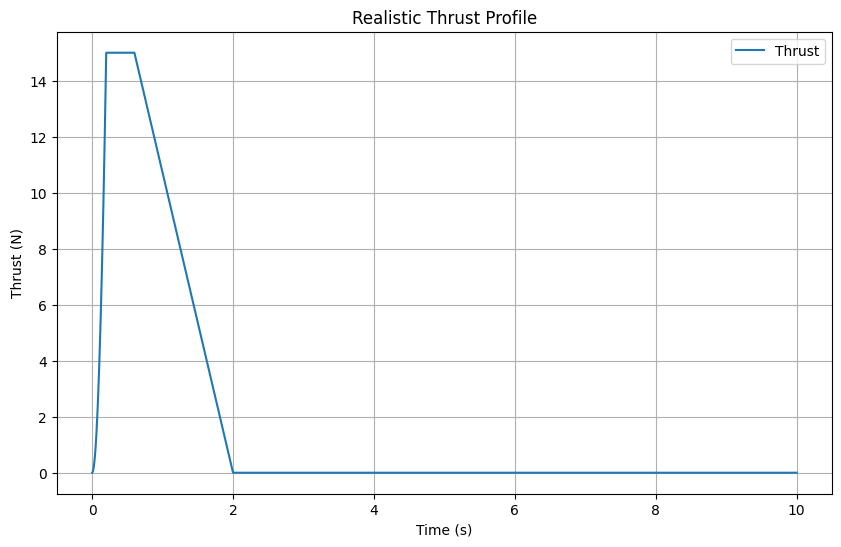

In [60]:
time_range = np.arange(0, simulation_duration + dt, dt)

plt.figure(figsize=(10, 6))
plt.plot(time_range, thrust_profile, label='Thrust')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.title('Realistic Thrust Profile')
plt.legend()
plt.grid()
plt.show()

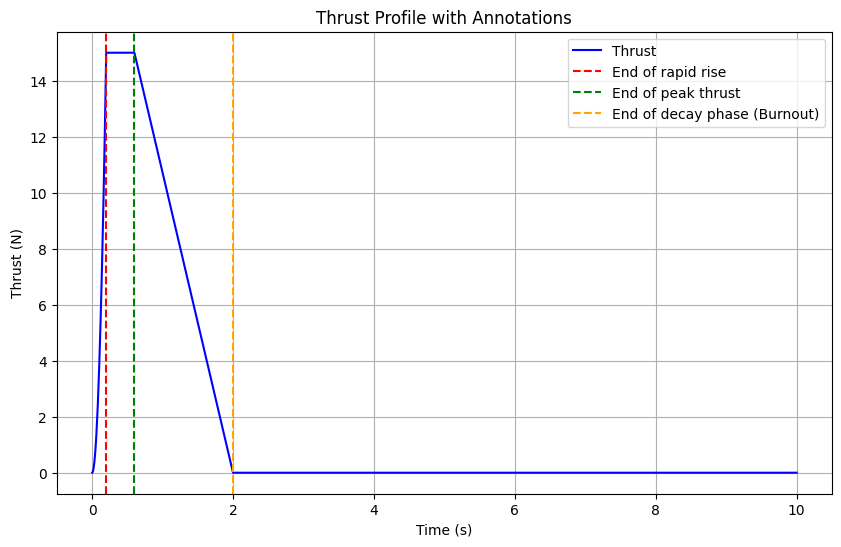

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(time_range, thrust_profile, label='Thrust', color='blue')

# Annotate the stages with vertical lines
plt.axvline(x=0.1 * thrust_duration, color='red', linestyle='--', label='End of rapid rise')
plt.axvline(x=0.3 * thrust_duration, color='green', linestyle='--', label='End of peak thrust')
plt.axvline(x=thrust_duration, color='orange', linestyle='--', label='End of decay phase (Burnout)')

# Plot labels and title
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.title('Thrust Profile with Annotations')
plt.legend()
plt.grid()
plt.show()